In [9]:
#TY ET A 44 Hemant Joshi
#1. Feature From Accelerated Segment Test (FAST) and 
#2.  Binary Robust Independent Elementary Features

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import pandas as pd

In [2]:
img = cv2.imread('D:\TYETA\CV\s2.jpg',0)

Threshold: 10
nonmaxSuppression:True
neighborhood: 2
Total Keypoints with nonmaxSuppression: 19416


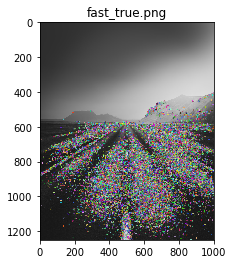

In [3]:
# Initiate FAST object with default values
fast = cv2.FastFeatureDetector_create()
kp = fast.detect(img,None)
img2 = cv2.drawKeypoints(img, kp, img, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# Print all default params
print( "Threshold: {}".format(fast.getThreshold()) )
print( "nonmaxSuppression:{}".format(fast.getNonmaxSuppression()) )
print( "neighborhood: {}".format(fast.getType()) )
print( "Total Keypoints with nonmaxSuppression: {}".format(len(kp)) )
plt.imshow(img2)
plt.title('fast_true.png')
plt.show()


In [4]:
brief =  cv2.xfeatures2d.BriefDescriptorExtractor_create()
kp, des = brief.compute(img, kp)

AttributeError: module 'cv2.cv2' has no attribute 'xfeatures2d'

In [5]:
#This is a python contrib error so ran this command on different ide and compiled a fast- brief descriptor csv.

In [6]:
import pickle
main_folder=r"D:\TYETA\CV\Data_Set"

for folder in os.listdir(main_folder):
    road_df=pd.read_csv(str(folder)+'.csv').iloc[:, 1:]
    kmeans = KMeans(n_clusters=5)
    model=kmeans.fit(road_df)
    pickle.dump(model, open(str(folder)+'.pkl', 'wb')) 

In [7]:
for folder in os.listdir(main_folder):
    model = pickle.load(open(str(folder)+'.pkl', "rb"))
    path=os.path.join(main_folder,folder)
    for filename in os.listdir(path):
        p=os.path.join(path,filename)
        a=cv2.imread(p)
        resize=(300,300)
        img=cv2.resize(a,resize)#resize image
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        orb = cv2.ORB_create(150)#initialise  detector
        keypoints, descriptors = orb.detectAndCompute(gray, None)
        out=pd.DataFrame(descriptors)
        
        output=pd.DataFrame(model.predict(out))
        hist=np.histogram(output.values,bins=[0,1,2,3,4,5])
        histout=pd.DataFrame(hist[0])
        
        csv_data=histout.transpose().to_csv(str(folder)+'1'+'.csv', mode='a', header=False)
        
    print('KMeans of ' + str(folder) +' images Done!')


KMeans of Cement Road images Done!
KMeans of Kaccha Road images Done!
KMeans of Paver Road images Done!
KMeans of Tarcoal Road images Done!


In [8]:
from csv import writer
from csv import reader

main_folder=r"D:\TYETA\CV\Data_Set"
i=0
for folder in os.listdir(main_folder):
    with open(str(folder)+'1'+'.csv', 'r') as read_obj, \
        open('Final_ORB_data.csv', 'a+', newline='') as write_obj:
        csv_reader = reader(read_obj)     # Create a csv.reader object from the input file object
        csv_writer = writer(write_obj)    # Create a csv.writer object from the output file object
        # Read each row of the input csv file as list
        for row in csv_reader:
            row.append(i)            # Append the class in the row / list
            csv_writer.writerow(row)      # Add the updated row / list to the output file
    i+=1